# Final Project Report

* Class: DS 5100
* Student Name: Liam Donoghue
* Student Net ID: bat7kt
* This URL: https://github.com/liamrdonoghue/montecarlo/blob/main/bat7kt_DS5100_FinalProject.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/liamrdonoghue/montecarlo

```python
import pandas as pd
import numpy as np
import random

class Die:
    """
    A class to represent a die with sides, or "faces", and weights. It can be rolled to select a face.
    """
    
    def __init__(self, faces:np.ndarray):
        """Sets up a die with faces. Weights default to 1.0.

        Parameters
        ----------
            faces : numpy array
                Can be any length. Values must be distinct.
        """
        if not isinstance(faces, np.ndarray):
            raise TypeError("Expects a Numpy array.")
        if len(faces) > len(set(faces)):
            raise ValueError("All values in faces array must be unique.")
        self.faces = faces
        self._faces_weights = pd.DataFrame({
            "Faces": faces,
            "Weights": np.ones(len(faces))
            })
    
    def change_weight(self, face, new_weight):
        """A way to change the weight of a specific face on the die. Weight must be a number.
        
        Parameters
        ----------
        face : str or int
            the face whose weight will change
        new_weight : float
            the new result weight
        
        Raises
        ------
        IndexError
            If the face passed is valid value, i.e. if it is in the die array
        TypeError
            If new_weight is not a number, i.e. not a float nor convertible to a float
        """
        if face not in self._faces_weights["Faces"].values:
            raise IndexError("Not a valid face value. Please pick a value currently on the die.")
        try:
            new_weight = float(new_weight)
        except ValueError:
            raise TypeError("Weight must be a number.")
        self._faces_weights.loc[self._faces_weights["Faces"] == face, "Weights"] = new_weight

    def roll_die(self, roll = 1):
        """A method to roll the die any number of times.
        
        Parameters
        ----------
        die_rolls : int
            How many times to roll the die. Defaults to 1.
        
        Returns
        -------
        result : list
            List of die roll outcomes.
        """
        return random.choices(self._faces_weights["Faces"].values, self._faces_weights["Weights"].values, k = roll)
    
    def show_state(self):
        """Shows the current faces and weights of the die.
        
        Returns
        -------
        Data frame of faces and weights
        """
        return self._faces_weights
 
#--------

class Game:
    """
    A "game" that consists of rolling one or more similar dice (Die objects) one or more times.
    """

    def __init__(self,dice):
        """Starts a game with a list of dice.
        
        Parameters
        ----------
        dice : list
            a list of Die objects
        """
        self.dice = dice
        self._result = None
    

    def play(self, die_rolls: int):
        """Method to play a game with a certain number of dice rolls and store the results.
        
        Parameters
        ----------
        die_rolls : int
            How many times the dice will be rolled.
        """
        result = {f"die_{i+1}": die.roll_die(die_rolls) for i, die in enumerate(self.dice)}
        self._result = pd.DataFrame(result, index=[f"roll_{i + 1}" for i in range(die_rolls)])

    def show_results(self, form = "wide"):
        """Method to show the result of the most recent play.
        
        Parameters
        ----------
        form : str
            Defines what form the data frame takes, either "wide" or "narrow." Defaults to "wide."

        Returns
        -------
            Data frame in either wide (default) or narrow form
        """         
        if form.lower() == "wide":
            return self._result
        elif form.lower() == "narrow":
            return (
                self._result
                .stack()
                .reset_index(name="Face Rolled")
                .rename(columns = {"level_0" : "Roll Number", "level_1" : "Die Number"})
                .set_index(["Roll Number", "Die Number"])
            )
        else:
            raise ValueError("Invalid option: form must be either 'wide' or 'narrow'.")

#--------

class Analyzer:
    """
    Takes the results of a single game and computes various descriptive statistical properties about it.
    """
    def __init__(self, game):
        """
        Parameters
        ----------
        game : Game
            A Game object
        
        Raises
        ------
        ValueError
            If the passed value is not a Game object
        """
        if not isinstance(game, Game):
            raise ValueError("Input must be a Game object.")
        self.game = game
        self.result = self.game.show_results

    def jackpot(self):
        """
        Computes how many times the game resulted in a jackpot, aka when all faces are the same.
        
        Returns
        -------
        Integer for the number of jackpots
        """
        jackpots = 0
        for i, row in self.game.show_results().iterrows():
            if len(set(row)) == 1:
                jackpots += 1
        return jackpots

    def face_counts(self):
        """
        Computes how many times a given face is rolled in each event.

        Returns
        -------
        Data frame of results in wide format, i.e. roll number as index, face values as columns, and count values in the cells
        """
        self.face_count = self.game.show_results().apply(pd.Series.value_counts, axis="columns").fillna(0).astype(int)
        self.face_count.columns.name = "Face"
        return self.face_count

    def combo_counts(self):
        """Computes the distinct combinations of faces rolled, along with their counts. Combos are order-independent and may contain repetitions.
        
        Returns
        -------
        Data frame with combos as a MultiIndex and their counts as column
        """
        sorted_rolls = self.game.show_results().apply(lambda x: tuple(sorted(x.values)), axis="columns")
        combo_counts = sorted_rolls.value_counts().to_frame("count")
        combo_counts.index.name = "combo"
        return combo_counts

    def permutation_counts(self):
        """Computes the distinct permutations of faces rolled, along with their counts. Permutations are order-dependent and may contain repetitions.
        
        Returns
        -------
        Data frame with permutations as a MultiIndex and their counts as a column.
        """
        permutation_counts = self.game.show_results().apply(tuple, axis=1).value_counts().to_frame("count")
        permutation_counts.index.name = "permutation"
        return permutation_counts
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
import unittest
from montecarlo import Die, Game, Analyzer
import pandas as pd
import numpy as np
import pandas.testing

class montecarlo_test_die(unittest.TestCase): 
    
    def test_change_weight(self):
        """
        Tests the change_weight() function with the correct input values.
        """
        die = Die(np.array([1,2,3,4,5,6]))
        die.change_weight(3, 4.0)
        expected = 4
        actual = die.show_state().loc[die.show_state()["Faces"] == 3, "Weights"].values[0]
        self.assertEqual(expected, actual)

    def test_change_weight_value_error(self):
        """
        Tests the change_weight() function with an incorrect face value.
        """
        die = Die(np.array([1,2,3,4,5,6]))
        with self.assertRaises(IndexError):
            die.change_weight(7, 4.0)
        
    def test_change_weight_type_error(self):
        """
        Tests the change_weight() function with an incorrect weight value.
        """
        die = Die(np.array([1,2,3,4,5,6]))
        with self.assertRaises(TypeError):
            die.change_weight(1, "Foo")

    def test_roll_die(self):
        """
        Tests the roll_die() function.
        """
        die = Die(np.array([1,2,3,4,5,6]))
        expected = 5
        actual = len(die.roll_die(5))
        self.assertEqual(expected, actual)

    def test_show_state(self):
        """
        Tests the show_state() function.
        """
        die = Die(np.array([1,2,3,4,5,6]))
        expected_df = pd.DataFrame({"Faces":[1,2,3,4,5,6], "Weights":[1.0,1.0,1.0,1.0,1.0,1.0]})
        actual_df = die.show_state()
        pandas.testing.assert_frame_equal(expected_df, actual_df, check_dtype=False)

class montecarlo_test_game(unittest.TestCase):

    def test_play(self):
        """
        Tests the play() function.
        """
        die = Die(np.array([1,2,3,4,5,6]))
        game = Game([die])
        game.play(3)
        self.assertEqual(len(game.show_results()), 3)
        self.assertEqual(len(game.show_results().columns), 1)
    
    def test_show_results_wide(self):
        """
        Tests the show_results() function with "wide" as the form parameter.
        """
        die = Die(np.array([1,2,3,4,5,6]))
        game = Game([die])
        game.play(100)
        result = game.show_results()
        self.assertIsInstance(result, pd.DataFrame)
        self.assertEqual(result.shape, (100, 1))
        
    def test_show_results_narrow(self):
        """
        Tests the show_results() function with "narrow" as the form parameter.
        """
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        game = Game([die1, die2])
        game.play(100)
        result = game.show_results("narrow")
        self.assertIsInstance(result, pd.DataFrame)
        self.assertEqual(len(result), 200)
        
    def test_show_results_wrong_input(self):
        """
        Tests the show_results() function with an incorrect input in the form parameter.
        """
        die = Die(np.array([1,2,3,4,5,6]))
        game = Game([die])
        with self.assertRaises(ValueError):
            game.show_results(form="foo")

class montecarlo_test_analyzer(unittest.TestCase):

    def test_jackpot(self):
        """
        Tests the jackpot() function.
        """
        die = Die(np.array([1,2,3,4,5,6]))
        game = Game([die])
        game.play(100)
        analyzer = Analyzer(game)
        jackpot_amt = analyzer.jackpot()
        jackpot_df_rows = (game.show_results() == game.show_results().iloc[:, 0].values[:, None]).all(axis="columns").sum()
        self.assertEqual(jackpot_amt, jackpot_df_rows)

    def test_face_counts(self):
        """
        Tests the face_counts() function.
        """
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        game = Game([die1, die2])
        game.play(100)
        analyzer = Analyzer(game)
        result = analyzer.face_counts()
        self.assertIsInstance(result, pd.DataFrame)
        self.assertEqual(len(result.columns), 6)

    def test_combo_counts(self):
        """
        Tests the combo_counts() function with default parameters.
        """
        die = Die(np.array([1,2,3,4,5,6]))
        game = Game([die])
        game.play(100)
        analyzer = Analyzer(game)
        result = analyzer.combo_counts()
        self.assertIsInstance(result, pd.DataFrame)
        self.assertIsInstance(result.index, pd.MultiIndex)
        self.assertEqual(len(result.columns), 1)
        
    def test_permutation_counts(self):
        """
        Tests the permutation_counts function.
        """
        die = Die(np.array([1,2,3,4,5,6]))
        game = Game([die])
        game.play(100)
        analyzer = Analyzer(game)
        result = analyzer.permutation_counts()
        self.assertIsInstance(result, pd.DataFrame)
        self.assertIsInstance(result.index, pd.MultiIndex)
        self.assertEqual(len(result.columns), 1)
        
if __name__ == "__main__":
    unittest.main()
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```python
.............
----------------------------------------------------------------------
Ran 13 tests in 0.084s
OK
-bash-4.4$
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [2]:
from montecarlo.montecarlo import Die, Game, Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [6]:
help(montecarlo.montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  Takes the results of a single game and computes various descriptive statistical properties about it.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Parameters
     |      ----------
     |      game : Game
     |          A Game object
     |      
     |      Raises
     |      ------
     |      ValueError
     |          If the passed value is not a Game object
     |  
     |  combo_counts(self)
     |      Computes the distinct combinations of faces rolled, along with their counts. Combos are order-independent and may contain repetitions.
     |      
     |      Returns
     |      -------
     |      Data frame with combos as a MultiIndex and their counts as column
     |  
     |  face_counts(self)
     |

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/liamrdonoghue/montecarlo/blob/main/readme.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

```
-bash-4.4$pip install .
Defaulting to user installation because normal site-packages is not writeable
Processing /sfs/gpfs/tardis/home/bat7kt/Documents/MSDS/DS5100/montecarlo
  Preparing metadata (setup.py) ... done
Building wheels for collected packages: montecarlo
  Building wheel for montecarlo (setup.py) ... done
  Created wheel for montecarlo: filename=montecarlo-0.1.0-py3-none-any.whl size=4577 sha256=0617434e83e82a9acff6cfcbc7c321fbe54b801ef69fec283f79e5c35ac38405
  Stored in directory: /tmp/pip-ephem-wheel-cache-l6zlk99u/wheels/d7/29/a1/39f69e848f49c3f7b5fa68ef876cae99288765a5c3698541e5
Successfully built montecarlo
Installing collected packages: montecarlo
  Attempting uninstall: montecarlo
    Found existing installation: montecarlo 0.1.0
    Uninstalling montecarlo-0.1.0:
      Successfully uninstalled montecarlo-0.1.0
Successfully installed montecarlo-0.1.0
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [1]:
import pandas as pd
import numpy as np

In [3]:
fair_coin = Die(np.array(["H", "T"]))
unfair_coin = Die(np.array(["H", "T"]))
unfair_coin.change_weight("H", 5)
fair_coin.show_state()

,Faces,Weights
0,H,1.0
1,T,1.0


In [4]:
unfair_coin.show_state()

,Faces,Weights
0,H,5.0
1,T,1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [5]:
game1 = Game([fair_coin, fair_coin])
game1.play(1000)
game1.show_results()

,die_1,die_2
roll_1,H,H
roll_2,T,T
roll_3,H,T
roll_4,H,T
roll_5,T,H
...,...,...
roll_996,H,T
roll_997,T,H
roll_998,H,H
roll_999,T,T


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [6]:
game2 = Game([unfair_coin, unfair_coin, fair_coin])
game2.play(1000)
game2.show_results()

,die_1,die_2,die_3
roll_1,H,H,T
roll_2,H,H,H
roll_3,H,H,H
roll_4,H,H,H
roll_5,H,H,H
...,...,...,...
roll_996,H,H,T
roll_997,H,H,H
roll_998,H,H,T
roll_999,H,H,T


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [7]:
analyzer1 = Analyzer(game1)
analyzer2 = Analyzer(game2)
jackpot1 = analyzer1.jackpot()
jackpot1

483

In [8]:
jackpot2 = analyzer2.jackpot()
jackpot2

367

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [9]:
rel_freq1 = jackpot1 / 1000
rel_freq1

0.483

In [10]:
rel_freq2 = jackpot2 / 1000
rel_freq2

0.367

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

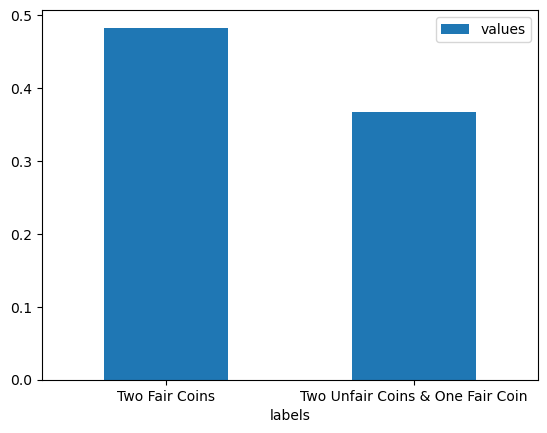

In [11]:
df = pd.DataFrame({"labels": ["Two Fair Coins", "Two Unfair Coins & One Fair Coin"], "values": [rel_freq1, rel_freq2]})
chart = df.plot.bar(x="labels", y="values", rot=0)

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [12]:
die1 = Die(np.array([1,2,3,4,5,6]))
die2 = Die(np.array([1,2,3,4,5,6]))
die3 = Die(np.array([1,2,3,4,5,6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [13]:
die1.change_weight(6, 5)
die1.show_state()

,Faces,Weights
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [14]:
die2.change_weight(1, 5)
die2.show_state()

,Faces,Weights
0,1,5.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [15]:
dicegame1 = Game([die3, die3, die3, die3, die3])
dicegame1.play(10000)
dicegame1.show_results()

,die_1,die_2,die_3,die_4,die_5
roll_1,5,3,3,1,4
roll_2,3,5,4,5,3
roll_3,3,4,5,5,4
roll_4,4,5,5,1,2
roll_5,5,5,6,2,6
...,...,...,...,...,...
roll_9996,5,5,3,4,4
roll_9997,4,4,1,2,5
roll_9998,3,3,5,6,6
roll_9999,5,2,2,6,4


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [16]:
dicegame2 = Game([die1, die2, die3, die3, die3])
dicegame2.play(10000)
dicegame2.show_results()

,die_1,die_2,die_3,die_4,die_5
roll_1,1,5,2,3,6
roll_2,1,1,3,6,4
roll_3,3,4,6,6,2
roll_4,6,3,6,6,1
roll_5,2,1,1,3,6
...,...,...,...,...,...
roll_9996,6,1,3,2,4
roll_9997,1,4,2,6,2
roll_9998,6,5,4,2,2
roll_9999,1,4,5,3,2


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [17]:
dice_analyzer1 = Analyzer(dicegame1)
dice_analyzer2 = Analyzer(dicegame2)
dice_jackpot1 = dice_analyzer1.jackpot()
dice_jackpot2 = dice_analyzer2.jackpot()
rel_freq3 = dice_jackpot1 / 10000
rel_freq4 = dice_jackpot2 / 10000

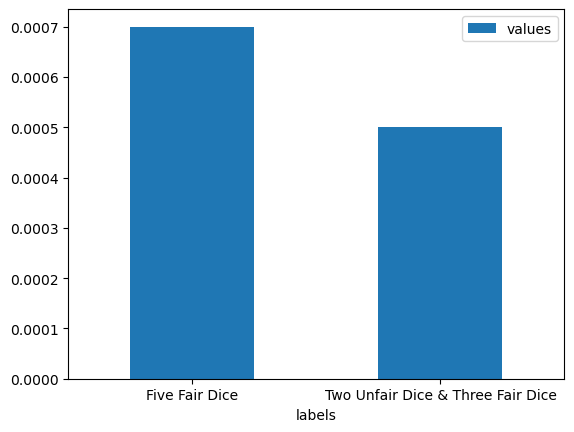

In [18]:
df2 = pd.DataFrame({"labels": ["Five Fair Dice", "Two Unfair Dice & Three Fair Dice"], "values": [rel_freq3, rel_freq4]})
chart = df2.plot.bar(x="labels", y="values", rot=0)

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [3]:
import string
letters = []
letters = np.array(list(string.ascii_uppercase))
letters_weights = pd.read_csv("english_letters.txt", sep = " ", header = None)
letter_die = Die(faces=letters)
for i, row in letters_weights.iterrows():
    letter_die.change_weight(face = row[0], new_weight = row[1])
letter_die.show_state()

,Faces,Weights
0,A,374061888.0
1,B,70195826.0
2,C,138416451.0
3,D,169330528.0
4,E,529117365.0
5,F,95422055.0
6,G,91258980.0
7,H,216768975.0
8,I,320410057.0
9,J,9613410.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [4]:
word_game = Game([letter_die, letter_die, letter_die, letter_die])
word_game.play(1000)
word_game.show_results()

,die_1,die_2,die_3,die_4
roll_1,H,I,U,H
roll_2,R,E,O,A
roll_3,V,O,E,T
roll_4,A,G,T,H
roll_5,O,S,L,I
...,...,...,...,...
roll_996,F,E,P,R
roll_997,E,L,D,A
roll_998,D,M,I,I
roll_999,L,I,B,D


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [10]:
word_analyzer = Analyzer(word_game)
word_df = word_analyzer.permutation_counts()
with open('scrabble_words.txt') as file:
    dictionary = set(word.strip().upper() for word in file.readlines())
actual_word_count = sum(1 for word in word_df.index if ''.join(word) in dictionary)
print("Actual words:", actual_word_count)
print("Difference between permutations and vocabulary:", 1000 - actual_word_count)

Actual words: 66
Difference between permutations and vocabulary: 934


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [11]:
word_game2 = Game([letter_die, letter_die, letter_die, letter_die, letter_die])
word_game2.play(1000)

word_analyzer2 = Analyzer(word_game2)
word_df2 = word_analyzer2.permutation_counts()
with open('scrabble_words.txt') as file:
    dictionary = set(word.strip().upper() for word in file.readlines())
actual_word_count2 = sum(1 for word in word_df2.index if ''.join(word) in dictionary)
print("Actual words:", actual_word_count2)
print("Difference between permutations and vocabulary:", 1000 - actual_word_count2)

Actual words: 3
Difference between permutations and vocabulary: 997


In [12]:
print("The parameter with more found words is the first one with only four letters by a margin of", actual_word_count - actual_word_count2)

The parameter with more found words is the first one with only four letters by a margin of 63
